# Realtime Kinetics usALEX Conversions to Photon-HDF5
> *This notebook converts the us-ALEX `.sm` data file into [Photon-HDF5](http://photon-hdf5.readthedocs.org/) file format.*

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [2]:
import phconvert as phc
phc.__version__

'0.7'

# Data files

Paste here the folder containing the `.sm` files to convert:

In [3]:
data_dir = '../realtime kinetics/data/singlespot'

In [4]:
path = Path(data_dir)
filenames = list(str(f) for f in path.glob('**/*.sm'))
basenames = list(f.stem for f in path.glob('**/*.sm'))
basenames

['bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1',
 'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2',
 'bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3',
 '005TAmin8_NTDmin5_kinetics_ITC7_to_runoff_T37C',
 '006TAmin8_NTDmin5_kinetics_RDE11_to_runoff_T37C',
 '007TAmin8_NTDmin5_kinetics_ITC4_to_runoff_T37C',
 '008TAmin8_NTDmin5_kinetics_ITC2_to_ITC7_T37C',
 '009TAmin8_NTDmin5_kinetics_ITC2_to_ITC4_T37C',
 '20dT_0_hybridization_kinetics_trial_1',
 '20dT_1_DNA_20dA_RNA_hybridization_kinetics_buffer_RT']

This is the list of the files that will be converted:

In [5]:
filenames

['../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1.sm',
 '../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2.sm',
 '../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3.sm',
 '../realtime kinetics/data/singlespot/controls/005TAmin8_NTDmin5_kinetics_ITC7_to_runoff_T37C.sm',
 '../realtime kinetics/data/singlespot/controls/006TAmin8_NTDmin5_kinetics_RDE11_to_runoff_T37C.sm',
 '../realtime kinetics/data/singlespot/controls/007TAmin8_NTDmin5_kinetics_ITC4_to_runoff_T37C.sm',
 '../realtime kinetics/data/singlespot/controls/008TAmin8_NTDmin5_kinetics_ITC2_to_ITC7_T37C.sm',
 '../realtime kinetics/data/singlespot/controls/009TAmin8_NTDmin5_kinetics_ITC2_to_ITC4_T37C.sm',
 '../realtime kinetics/data/singlespot/controls/20dT_0_hybridization_kinetics_trial_1.sm',
 '../realtime kinetics/data/singlespot/controls/20dT_1_DNA_20dA_RNA_hybridization_kinetics_buffer_RT

# Author

In [6]:
author = 'Eitan Lerner'
author_affiliation = 'UCLA'
creator = 'Antonino Ingargiola'
creator_affiliation = 'UCLA'

# Sample

In [7]:
buffer_name = ('Transcription buffer: 40 mM HEPES KOH, 50 mM KCl, 10 mM MgCl2, '
               '1 mM DTT, 1 mM cysteamine, 0.01% Tween 20, '
               '1 mM 5minute UV-illuminated Trolox, 100 ug/mL BSA, pH 7.')

In [8]:
descriptions = [
    'Realtime kinetics from ITC2 to runoff. T=37C',
    'Realtime kinetics from ITC2 to runoff. T=37C',
    'Realtime kinetics from ITC2 to runoff. T=37C',
    'Realtime kinetics from ITC7 to runoff. T=37C',
    'Realtime kinetics from RDE11 to runoff. T=37C',
    'Realtime kinetics from ITC4 to runoff. T=37C',
    'Realtime kinetics from ITC2 to ITC7. T=37C',
    'Realtime kinetics from ITC2 to ITC4. T=37C',
    "Realtime kinetics of 20dT DNA + 20dA DNA hybridization. T=37C",
    "Realtime kinetics of 20dT DNA + 20dA RNA hybridization. T=37C",
]

In [9]:
sample_names = [
    'RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'ITC7 + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'RDE11 + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'ITC4 + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'ITC2 + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    'ITC2 + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550',
    "20dT DNA (5'TMR - 3' Alexa647) + 20dA DNA",
    "20dT DNA (5'TMR - 3' Alexa647) + 20dA RNA",
]

# Test one file

In [10]:
idx = 0
filename = filenames[idx]
sample_name = sample_names[idx]
description = descriptions[idx]
dye_names = 'ATTO550, ATTO647N' if 'lacCONS' in sample_name else 'TMR, Alex647'

In [11]:
sample_name

'RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550'

In [12]:
description

'Realtime kinetics from ITC2 to runoff. T=37C'

In [13]:
dye_names

'ATTO550, ATTO647N'

In [14]:
d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2150, 3900),
                         alex_period_acceptor = (200, 1900),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

 - Loading '../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1.sm' ... 


/Users/anto/miniconda3/lib/python3.5/site-packages/phconvert/smreader.py:94: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ch_labels = [decoder.readstring() for _ in range(num_channels)]


 [DONE]



In [15]:
ph_data = d['photon_data']
det = ph_data['detectors']
timestamps = ph_data['timestamps']

In [16]:
np.unique(det)

array([0, 1], dtype=uint32)

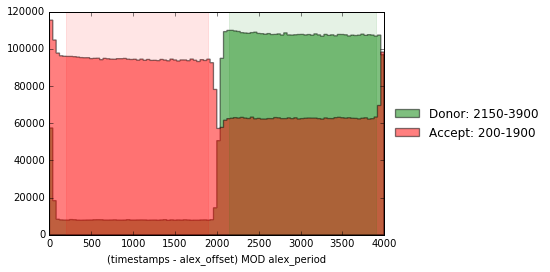

In [17]:
phc.plotter.alternation_hist(d)

## Add author and sample info

In [18]:
d['description'] = description

d['sample'] = dict(
    sample_name=sample_name,
    dye_names=dye_names,
    buffer_name=buffer_name,
    num_dyes = len(dye_names.split(',')))

d['identity'] = dict(
    author=author,
    author_affiliation=author_affiliation,
    creator=creator,
    creator_affiliation=creator_affiliation)

## Validation

In [19]:
#phc.hdf5.save_photon_hdf5(d)

# Convert all the files

In [20]:
for idx, filename in enumerate(filenames):
    sample_name = sample_names[idx]
    description = descriptions[idx]
    dye_names = 'ATTO550, ATTO647N' if 'lacCONS' in sample_name else 'TMR, Alex647'    

    print(filename)
    print(sample_name)
    print(description)
    print(dye_names + '\n')
    
    d = phc.loader.usalex_sm(filename,
                         donor = 0,
                         acceptor = 1,
                         alex_period = 4000,
                         alex_offset = 700,
                         alex_period_donor = (2150, 3900),
                         alex_period_acceptor = (200, 1900),
                         excitation_wavelengths = (532e-9, 635e-9),
                         detection_wavelengths = (580e-9, 680e-9))

    
    d['description'] = description

    d['sample'] = dict(
        sample_name=sample_name,
        dye_names=dye_names,
        buffer_name=buffer_name,
        num_dyes = len(dye_names.split(',')))


    d['identity'] = dict(
        author=author,
        author_affiliation=author_affiliation,
        creator=creator,
        creator_affiliation=creator_affiliation)
    
    phc.hdf5.save_photon_hdf5(d, overwrite=True)

../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1.sm
RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550
Realtime kinetics from ITC2 to runoff. T=37C
ATTO550, ATTO647N

 - Loading '../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1.sm' ... 


/Users/anto/miniconda3/lib/python3.5/site-packages/phconvert/smreader.py:94: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  ch_labels = [decoder.readstring() for _ in range(num_channels)]


 [DONE]

Saving: ../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1.hdf5
../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2.sm
RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550
Realtime kinetics from ITC2 to runoff. T=37C
ATTO550, ATTO647N

 - Loading '../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2.sm' ... 
 [DONE]

Saving: ../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2.hdf5
../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3.sm
RPO + lacCONS promoter labeled at NT(-8)ATTO647N - T(-5)ATTO550
Realtime kinetics from ITC2 to runoff. T=37C
ATTO550, ATTO647N

 - Loading '../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3.sm' ... 
 [DONE]

Saving: ../realtime kinetics/data/singlespot/bubble-bubble_AL

## Load the converted files

In [21]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1101/039198 

--------------------------------------------------------------


In [22]:
from IPython.display import display

../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_1.hdf5
#donor: 5061875  #acceptor: 6758964 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


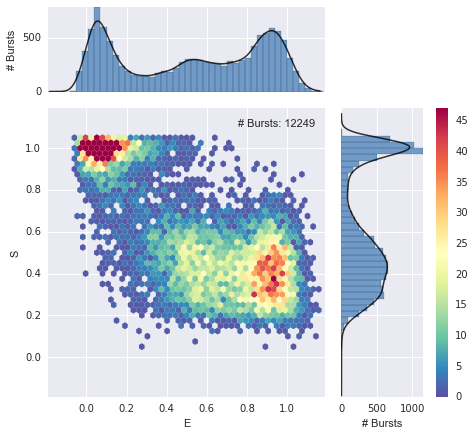

../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_2.hdf5
#donor: 5991074  #acceptor: 10360101 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


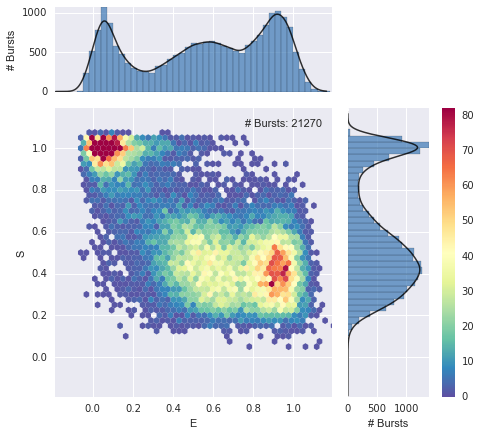

../realtime kinetics/data/singlespot/bubble-bubble_ALEX_150uWGreen_100uWRed_Runoff_kinetics_RT_3.hdf5
#donor: 5773348  #acceptor: 13274635 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


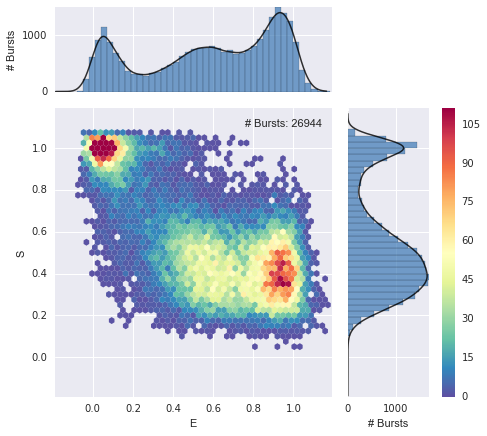

../realtime kinetics/data/singlespot/controls/005TAmin8_NTDmin5_kinetics_ITC7_to_runoff_T37C.hdf5
#donor: 5162052  #acceptor: 12748709 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


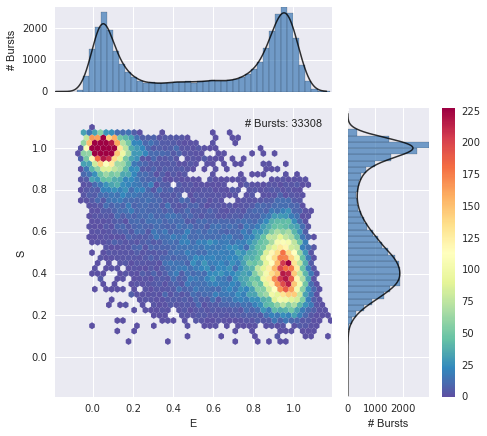

../realtime kinetics/data/singlespot/controls/006TAmin8_NTDmin5_kinetics_RDE11_to_runoff_T37C.hdf5
#donor: 3871521  #acceptor: 6635482 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


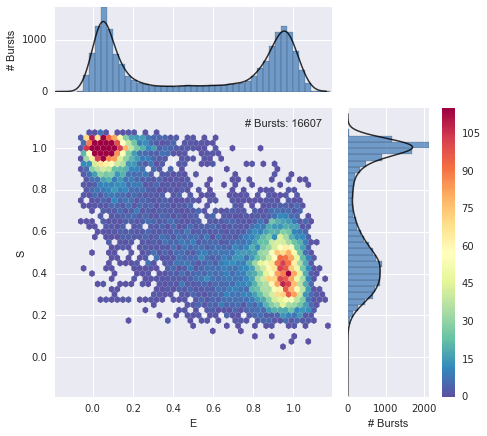

../realtime kinetics/data/singlespot/controls/007TAmin8_NTDmin5_kinetics_ITC4_to_runoff_T37C.hdf5
#donor: 4490078  #acceptor: 9121661 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


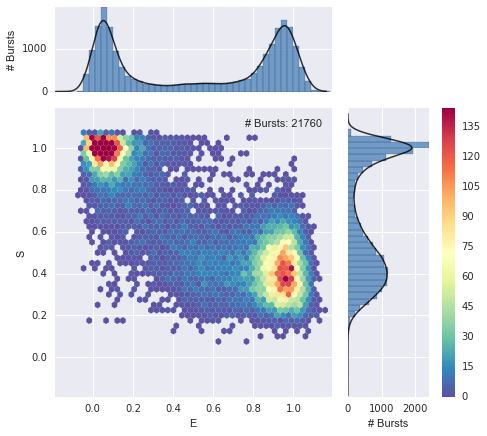

../realtime kinetics/data/singlespot/controls/008TAmin8_NTDmin5_kinetics_ITC2_to_ITC7_T37C.hdf5
#donor: 4777609  #acceptor: 10402264 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


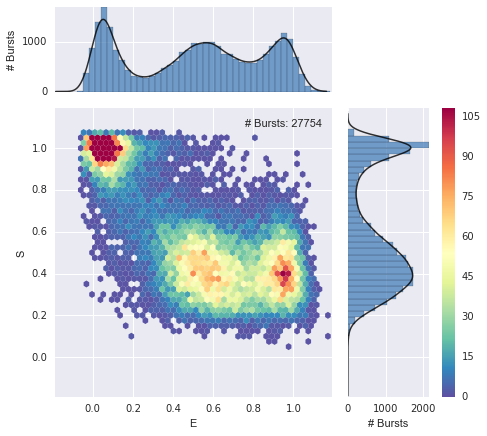

../realtime kinetics/data/singlespot/controls/009TAmin8_NTDmin5_kinetics_ITC2_to_ITC4_T37C.hdf5
#donor: 3976960  #acceptor: 7085587 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


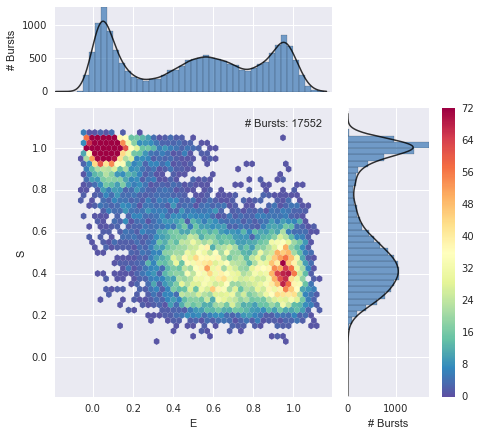

../realtime kinetics/data/singlespot/controls/20dT_0_hybridization_kinetics_trial_1.hdf5
#donor: 7049395  #acceptor: 9853832 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


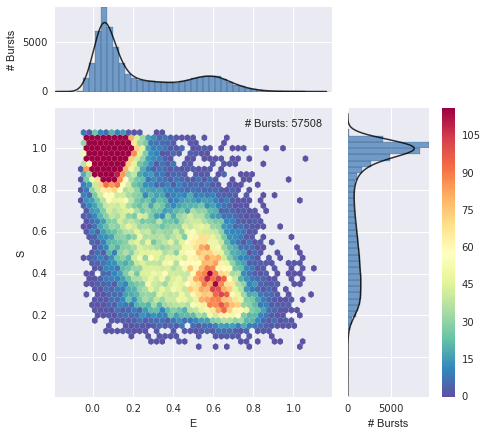

../realtime kinetics/data/singlespot/controls/20dT_1_DNA_20dA_RNA_hybridization_kinetics_buffer_RT.hdf5
#donor: 8043784  #acceptor: 8110907 

 - Calculating BG rates ... [DONE]
 - Performing burst search (verbose=False) ...[DONE]
 - Calculating burst periods ...[DONE]
 - Counting D and A ph and calculating FRET ... 
   - Applying background correction.
   - Applying leakage correction.
   - Applying direct excitation correction.
   [DONE Counting D/A]


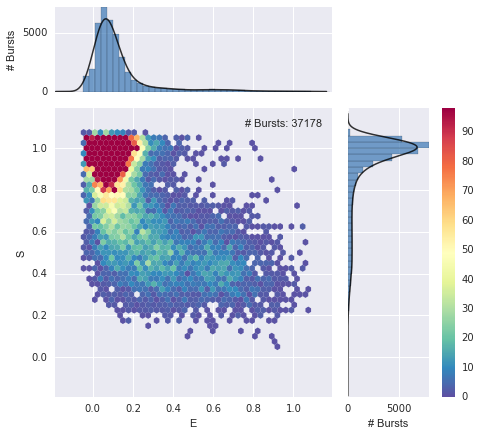

In [23]:
for fname in filenames:
    fname = fname[:-2] + 'hdf5'
    print(fname)
    
    d = loader.photon_hdf5(fname)
    loader.alex_apply_period(d)
    
    d.calc_bg(fun=bg.exp_fit)
    d.burst_search()
    ds = d.select_bursts(select_bursts.size, th1=20)
    alex_jointplot(ds)
    fig = plt.gcf()
    plt.close(fig)
    display(fig)